In [1]:
from alntk.alignment import Alignment, filter_compact, write_to_fasta
from alntk.plotting import default_plot_style

import matplotlib.pyplot as plt

In [2]:
data_folder = '../data/'
color_cycle = default_plot_style()

In [3]:
aln = Alignment()
aln.import_from_fasta(data_folder + 'new_aln.faa')
aln.print_report()

Number of sequences: 106557
Number of positions: 693


In [4]:
aln.reset_pos()
aln.reset_seq()

In [5]:
orig_seq_gap = aln.get_seq_gap()
orig_pos_gap = aln.get_pos_gap()

In [6]:
aln_filter = filter_compact(aln, 0.95)
aln.drop(aln_filter)
aln.print_report()

Number of sequences: 51255
Number of positions: 309


In [7]:
comp_seq_gap = aln.get_seq_gap()
comp_pos_gap = aln.get_pos_gap()

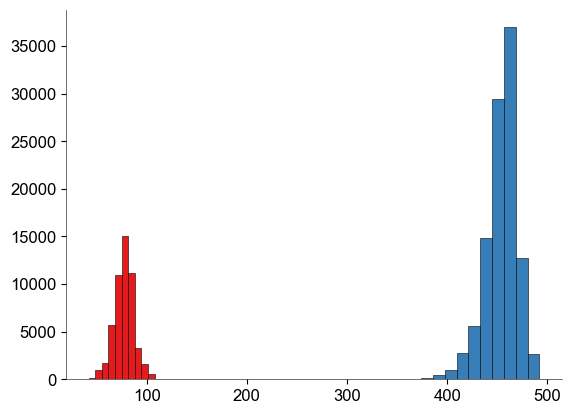

In [8]:
fig = plt.figure()
plt.hist(orig_seq_gap)
plt.hist(comp_seq_gap)
plt.show()

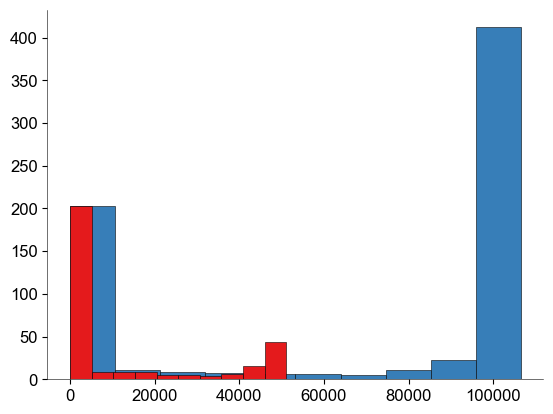

In [9]:
fig = plt.figure()
plt.hist(orig_pos_gap)
plt.hist(comp_pos_gap)
plt.show()

In [10]:
for i in range(1, 4):
    print(f"Compact filter - Iteration #{i}")
    aln_filter = filter_compact(aln, 0.95)
    aln.drop(aln_filter)
    aln.print_report()

Compact filter - Iteration #1
Number of sequences: 31893
Number of positions: 279
Compact filter - Iteration #2
Number of sequences: 24397
Number of positions: 264
Compact filter - Iteration #3
Number of sequences: 21188
Number of positions: 260


In [11]:
iter_seq_gap = aln.get_seq_gap()
iter_pos_gap = aln.get_pos_gap()

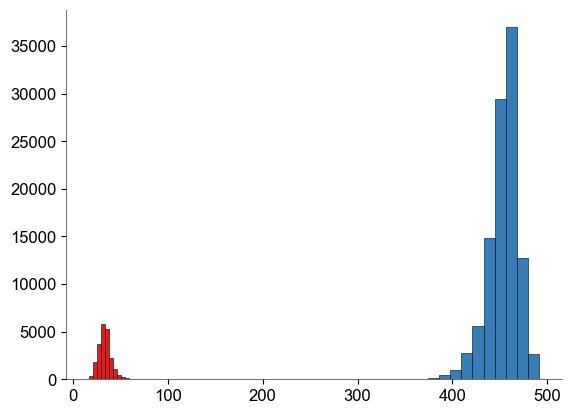

In [12]:
fig = plt.figure()
plt.hist(orig_seq_gap)
plt.hist(iter_seq_gap)
plt.show()

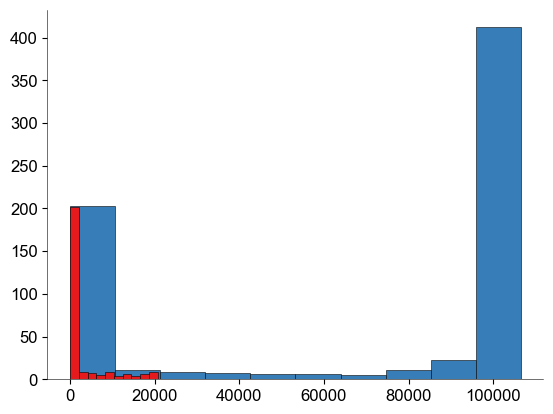

In [13]:
fig = plt.figure()
plt.hist(orig_pos_gap)
plt.hist(iter_pos_gap)
plt.show()

In [16]:
aln.reset_seq()
aln.print_report()

Number of sequences: 106557
Number of positions: 260


In [19]:
iterall_seq_gap = aln.get_seq_gap()
iterall_pos_gap = aln.get_pos_gap()

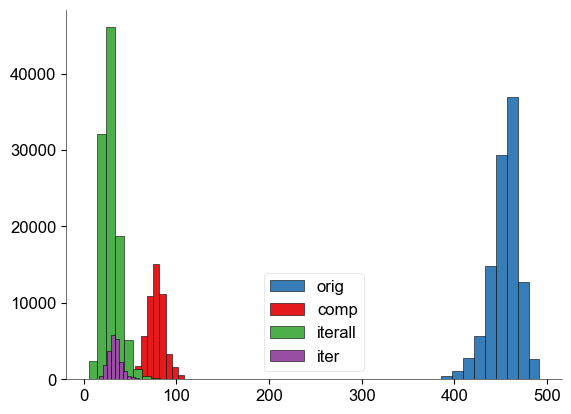

In [25]:
fig = plt.figure()
plt.hist(orig_seq_gap, label='orig')
plt.hist(comp_seq_gap, label='comp')
plt.hist(iterall_seq_gap, label='iterall')
plt.hist(iter_seq_gap, label='iter')
plt.legend()
plt.show()

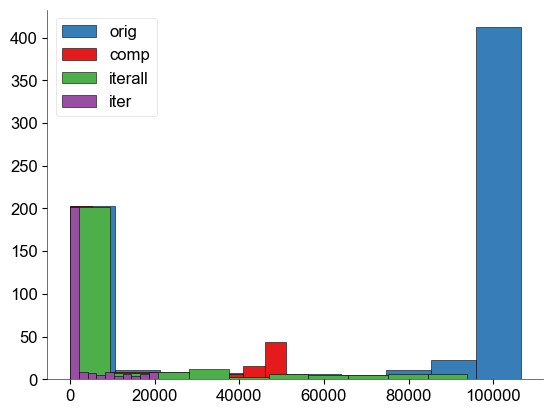

In [26]:
fig = plt.figure()
plt.hist(orig_pos_gap, label='orig')
plt.hist(comp_pos_gap, label='comp')
plt.hist(iterall_pos_gap, label='iterall')
plt.hist(iter_pos_gap, label='iter')
plt.legend()
plt.show()